In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
enrol = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")
demo  = pd.read_csv("api_data_aadhar_demographic_0_500000.csv")
bio   = pd.read_csv("api_data_aadhar_biometric_0_500000.csv")

enrol.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,31-12-2025,Karnataka,Bidar,585330,2,3,0
1,31-12-2025,Karnataka,Bidar,585402,6,0,0
2,31-12-2025,Karnataka,Bidar,585413,1,0,0
3,31-12-2025,Karnataka,Bidar,585418,1,2,0
4,31-12-2025,Karnataka,Bidar,585421,4,3,0


In [11]:
enrol_clean = enrol.copy()

enrol_clean["date"] = pd.to_datetime(
    enrol_clean["date"],
    dayfirst=True,
    errors="coerce"
)

enrol_clean["month"] = enrol_clean["date"].dt.to_period("M")

In [12]:
enrol_grp = enrol_clean.groupby(
    ["month", "state"],
    as_index=False
)[["age_0_5", "age_5_17", "age_18_greater"]].sum()

In [13]:
enrol_grp["total_enrolment"] = (
    enrol_grp["age_0_5"] +
    enrol_grp["age_5_17"] +
    enrol_grp["age_18_greater"]
)

enrol_grp.head()

,month,state,age_0_5,age_5_17,age_18_greater,total_enrolment
0,2025-12,Andhra Pradesh,445,92,0,537
1,2025-12,Arunachal Pradesh,3,18,0,21
2,2025-12,Assam,215,322,25,562
3,2025-12,Bihar,888,2566,43,3497
4,2025-12,Chandigarh,9,0,0,9


In [14]:
national_trend = enrol_grp.groupby(
    "month",
    as_index=False
)["total_enrolment"].sum()

national_trend

,month,total_enrolment
0,2025-12,43389


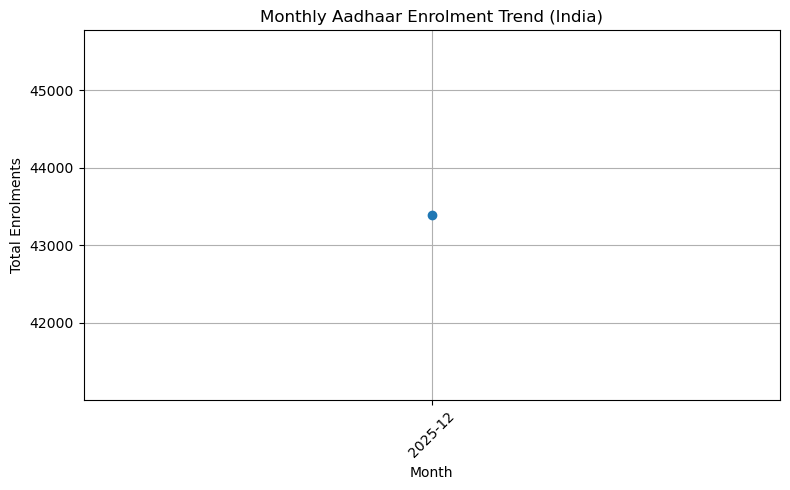

In [15]:
plt.figure(figsize=(8,5))
plt.plot(
    national_trend["month"].astype(str),
    national_trend["total_enrolment"],
    marker="o"
)

plt.title("Monthly Aadhaar Enrolment Trend (India)")
plt.xlabel("Month")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
age_share = enrol_grp.copy()

age_share["child_share"] = (
    age_share["age_0_5"] + age_share["age_5_17"]
) / age_share["total_enrolment"]

age_share["adult_share"] = (
    age_share["age_18_greater"]
) / age_share["total_enrolment"]

age_share.sort_values("child_share", ascending=False).head(10)

,month,state,age_0_5,age_5_17,age_18_greater,total_enrolment,child_share,adult_share
0,2025-12,Andhra Pradesh,445,92,0,537,1.0,0.0
8,2025-12,Goa,13,2,0,15,1.0,0.0
17,2025-12,Lakshadweep,3,0,0,3,1.0,0.0
16,2025-12,Ladakh,3,1,0,4,1.0,0.0
25,2025-12,Orissa,18,16,0,34,1.0,0.0
12,2025-12,Jammu and Kashmir,115,61,0,176,1.0,0.0
11,2025-12,Himachal Pradesh,91,8,0,99,1.0,0.0
26,2025-12,Pondicherry,2,1,0,3,1.0,0.0
27,2025-12,Puducherry,12,1,0,13,1.0,0.0
6,2025-12,Daman and Diu,0,1,0,1,1.0,0.0


In [21]:
enrol_state_month = (
    enrol
    .groupby(["state"], as_index=False)[
        ["age_0_5", "age_5_17", "age_18_greater"]
    ]
    .sum()
)

enrol_state_month.head()

,state,age_0_5,age_5_17,age_18_greater
0,Andhra Pradesh,445,92,0
1,Arunachal Pradesh,3,18,0
2,Assam,215,322,25
3,Bihar,888,2566,43
4,Chandigarh,9,0,0


In [22]:
enrol_state_month["adult_ratio"] = (
    enrol_state_month["age_18_greater"] /
    (enrol_state_month["age_0_5"] + enrol_state_month["age_5_17"] + enrol_state_month["age_18_greater"])
)

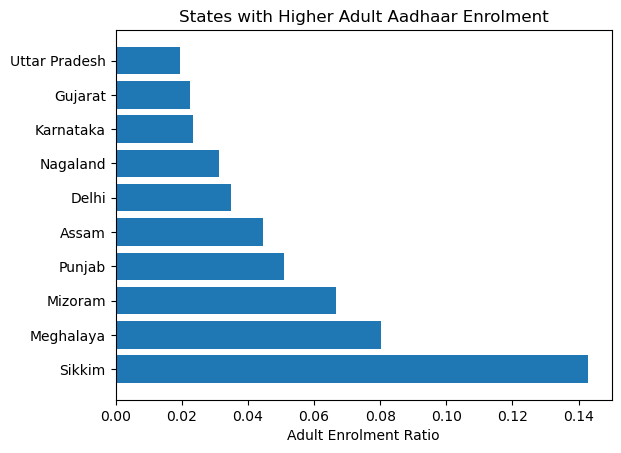

In [23]:
top_states = enrol_state_month.sort_values(
    "adult_ratio", ascending=False
).head(10)

plt.figure()
plt.barh(top_states["state"], top_states["adult_ratio"])
plt.xlabel("Adult Enrolment Ratio")
plt.title("States with Higher Adult Aadhaar Enrolment")
plt.show()

In [24]:
enrol_grp["total"] = (
    enrol_grp["age_0_5"] +
    enrol_grp["age_5_17"] +
    enrol_grp["age_18_greater"]
)

enrol_grp["adult_pct"] = (
    enrol_grp["age_18_greater"] / enrol_grp["total"]
) * 100

In [25]:
top_adult = enrol_grp.sort_values(
    by="adult_pct", ascending=False
).head(5)

top_adult[["state", "adult_pct"]]

,state,adult_pct
30,Sikkim,14.285714
21,Meghalaya,8.029197
22,Mizoram,6.666667
28,Punjab,5.106383
2,Assam,4.448399


In [26]:
demo.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [27]:
demo_clean = demo.copy()

demo_clean["date"] = pd.to_datetime(
    demo_clean["date"],
    dayfirst=True,
    errors="coerce"
)

demo_clean["month"] = demo_clean["date"].dt.to_period("M")

In [28]:
demo_grp = (
    demo_clean
    .groupby(["month", "state"], as_index=False)
    .sum(numeric_only=True)
)

demo_grp.head()

,month,state,pincode,demo_age_5_17,demo_age_17_
0,2025-03,Andaman and Nicobar Islands,744202,10,201
1,2025-03,Andhra Pradesh,302682696,16968,158296
2,2025-03,Arunachal Pradesh,9493905,249,1759
3,2025-03,Assam,138068187,6139,66854
4,2025-03,Bihar,325105515,35869,374060


In [32]:
demo_grp["total_demo_updates"] = demo_grp.select_dtypes("number").sum(axis=1)

In [33]:
demo_grp[["month", "state", "total_demo_updates"]].head()

,month,state,total_demo_updates
0,2025-03,Andaman and Nicobar Islands,744413
1,2025-03,Andhra Pradesh,302857960
2,2025-03,Arunachal Pradesh,9495913
3,2025-03,Assam,138141180
4,2025-03,Bihar,325515444


In [34]:
enrol_grp["total_enrolment"] = (
    enrol_grp["age_0_5"] +
    enrol_grp["age_5_17"] +
    enrol_grp["age_18_greater"]
)

In [35]:
enrol_grp[["month", "state", "total_enrolment"]].head()

,month,state,total_enrolment
0,2025-12,Andhra Pradesh,537
1,2025-12,Arunachal Pradesh,21
2,2025-12,Assam,562
3,2025-12,Bihar,3497
4,2025-12,Chandigarh,9


In [36]:
final_df = pd.merge(
    enrol_grp[["month", "state", "total_enrolment"]],
    demo_grp[["month", "state", "total_demo_updates"]],
    on=["month", "state"],
    how="inner"
)

In [37]:
final_df.head()

,month,state,total_enrolment,total_demo_updates
0,2025-12,Andhra Pradesh,537,6476762370
1,2025-12,Arunachal Pradesh,21,209651467
2,2025-12,Assam,562,3123239575
3,2025-12,Bihar,3497,5089029106
4,2025-12,Chandigarh,9,17746464


In [41]:
import pandas as pd

df = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,31-12-2025,Karnataka,Bidar,585330,2,3,0
1,31-12-2025,Karnataka,Bidar,585402,6,0,0
2,31-12-2025,Karnataka,Bidar,585413,1,0,0
3,31-12-2025,Karnataka,Bidar,585418,1,2,0
4,31-12-2025,Karnataka,Bidar,585421,4,3,0


In [46]:
print(final_df.columns)

Index(['month', 'state', 'total_enrolment', 'total_demo_updates'], dtype='object')


In [47]:
final_df["update_enrol_ratio"] = (
    final_df["total_demo_updates"] / final_df["total_enrolment"]
)

In [48]:
final_df.head()

,month,state,total_enrolment,total_demo_updates,update_enrol_ratio
0,2025-12,Andhra Pradesh,537,6476762370,1.206101e+07
1,2025-12,Arunachal Pradesh,21,209651467,9.983403e+06
2,2025-12,Assam,562,3123239575,5.557366e+06
3,2025-12,Bihar,3497,5089029106,1.455256e+06
4,2025-12,Chandigarh,9,17746464,1.971829e+06


In [49]:
top_states = (
    final_df.groupby("state")["update_enrol_ratio"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_states

state
Pondicherry          3.143277e+07
Orissa               2.038907e+07
Sikkim               1.884933e+07
Andhra Pradesh       1.206101e+07
Mizoram              1.077729e+07
Daman and Diu        1.003234e+07
Arunachal Pradesh    9.983403e+06
Goa                  9.925981e+06
Puducherry           9.105450e+06
Lakshadweep          8.418201e+06
Name: update_enrol_ratio, dtype: float64

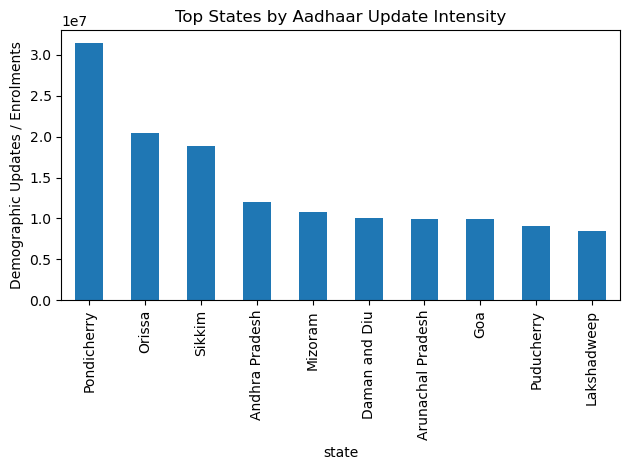

In [50]:
top_states.plot(
    kind="bar",
    title="Top States by Aadhaar Update Intensity"
)
plt.ylabel("Demographic Updates / Enrolments")
plt.tight_layout()
plt.show()

In [51]:
bio = pd.read_csv("api_data_aadhar_biometric_0_500000.csv")
bio.columns = bio.columns.str.strip()
bio.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [52]:
bio_grp = (
    bio.groupby("state", as_index=False)
    .sum(numeric_only=True)
)

In [55]:
numeric_cols = bio_grp.select_dtypes(include="number").columns

bio_grp["total_bio_updates"] = bio_grp[numeric_cols].sum(axis=1)

bio_grp.head()

,state,pincode,bio_age_5_17,bio_age_17_,total_bio_updates
0,Andaman & Nicobar Islands,101944182,182,1200,101945564
1,Andaman and Nicobar Islands,282790166,7686,5654,282803506
2,Andhra Pradesh,23373682194,1585202,984103,23376251499
3,Arunachal Pradesh,964219974,23368,23646,964266988
4,Assam,10183885949,373246,205556,10184464751


In [56]:
bio_final = pd.merge(
    enrol_grp[["state", "total_enrolment"]],
    bio_grp[["state", "total_bio_updates"]],
    on="state",
    how="inner"
)

In [57]:
final_df = final_df.merge(
    bio_grp[["state", "total_bio_updates"]],
    on="state",
    how="inner"
)

final_df["bio_update_ratio"] = (
    final_df["total_bio_updates"] / final_df["total_enrolment"]
)

final_df.head()

,month,state,total_enrolment,total_demo_updates,update_enrol_ratio,total_bio_updates,bio_update_ratio
0,2025-12,Andhra Pradesh,537,6476762370,1.206101e+07,23376251499,4.353119e+07
1,2025-12,Arunachal Pradesh,21,209651467,9.983403e+06,964266988,4.591748e+07
2,2025-12,Assam,562,3123239575,5.557366e+06,10184464751,1.812182e+07
3,2025-12,Bihar,3497,5089029106,1.455256e+06,19184888747,5.486099e+06
4,2025-12,Chandigarh,9,17746464,1.971829e+06,75042000,8.338000e+06


In [58]:
final_df.sort_values(
    by="update_enrol_ratio",
    ascending=False
).head(10)[["state", "update_enrol_ratio"]]

,state,update_enrol_ratio
26,Pondicherry,3.143277e+07
25,Orissa,2.038907e+07
30,Sikkim,1.884933e+07
0,Andhra Pradesh,1.206101e+07
22,Mizoram,1.077729e+07
6,Daman and Diu,1.003234e+07
1,Arunachal Pradesh,9.983403e+06
8,Goa,9.925981e+06
27,Puducherry,9.105450e+06
17,Lakshadweep,8.418201e+06


In [59]:
final_df.sort_values(
    by="update_enrol_ratio",
    ascending=True
).head(5)[["state", "update_enrol_ratio"]]

,state,update_enrol_ratio
34,Uttar Pradesh,231352.789536
7,Delhi,301574.017391
18,Madhya Pradesh,337446.560239
29,Rajasthan,457962.947723
10,Haryana,710991.753943


<Axes: title={'center': 'Top States by Aadhaar Update Intensity'}, xlabel='state'>

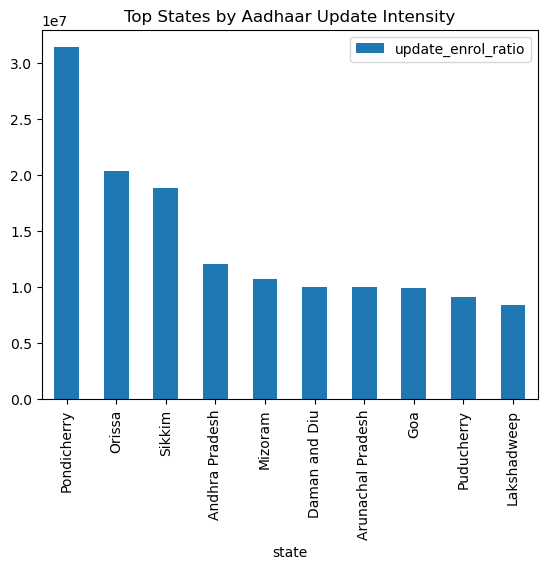

In [60]:
top = final_df.sort_values(
    "update_enrol_ratio",
    ascending=False
).head(10)

top.plot(
    x="state",
    y="update_enrol_ratio",
    kind="bar",
    title="Top States by Aadhaar Update Intensity"
)